In [3]:
from tensorflow.keras.datasets import mnist

2023-08-25 22:09:16.279207: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-25 22:09:16.281738: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 22:09:16.321262: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 22:09:16.322507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 22:09:17.220378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Inspect the data 
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)


x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [7]:
# reshape the data to a 2d tensor (num_samples, 28*28)
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

In [72]:
# set up a keras sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

baseline_model = Sequential()
baseline_model.add(Dense(64, activation='relu', input_shape=(28*28,)))
baseline_model.add(Dense(64, activation='relu'))
baseline_model.add(Dense(10, activation='softmax'))


In [73]:
baseline_model.compile(optimizer=SGD(learning_rate=0.01),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# evaluate the size of the model and memory usage
baseline_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history_baseline = baseline_model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 4s 9ms/step - loss: 1.5002 - accuracy: 0.5855 - val_loss: 0.8114 - val_accuracy: 0.8071
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.6517 - accuracy: 0.8288 - val_loss: 0.4964 - val_accuracy: 0.8693
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.4749 - accuracy: 0.8704 - val_loss: 0.4024 - val_accuracy: 0.8904
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.4054 - accuracy: 0.8862 - val_loss: 0.3604 - val_accuracy: 0.8982
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3678 - accuracy: 0.8959 - val_loss: 0.3325 - val_accuracy: 0.9051
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3428 - accuracy: 0.9022 - val_loss: 0.3127 - val_accuracy: 0.9110
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3241 - accuracy: 0.9077 - val_loss: 0.2997 - val_accuracy: 0.9143
Epoch 

In [75]:

# evaluate the model
test_loss, test_acc= baseline_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1883 - accuracy: 0.9469


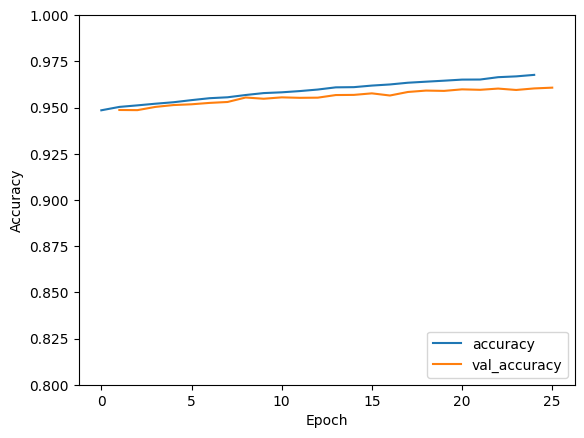

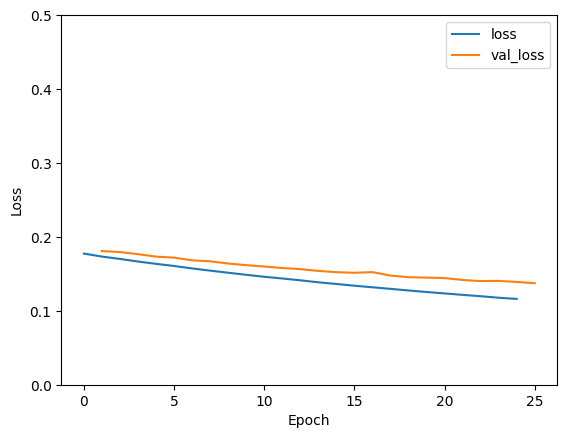

In [31]:
# plot the history
import matplotlib.pyplot as plt
from IPython.display import display

plt.plot(range(len(history_baseline.history['accuracy'])), history_baseline.history['accuracy'], label='accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'])+1), history_baseline.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# plot the loss 
plt.plot(range(len(history_baseline.history['loss'])), history_baseline.history['loss'], label='loss')
plt.plot(range(1,len(history_baseline.history['loss'])+1), history_baseline.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()


In [76]:
# store the lowest loss and highest accuracy
lowest_loss = min(history_baseline.history['val_loss'])
highest_acc = max(history_baseline.history['val_accuracy'])


In [77]:
# lets get the activations of the first layer from the trained model for a test image

# get the activations of the first layer
from tensorflow.keras.models import Model
import numpy as np

layer_outputs = [layer.output for layer in baseline_model.layers]
layer_names = [layer.name for layer in baseline_model.layers]
print(layer_outputs)
activation_model = Model(inputs=baseline_model.inputs, outputs=layer_outputs)
activation_model.summary()

[<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>, <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_7')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_8')>]
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (

In [78]:
(dense_activations, dense_1_activations, dense_2_activations) = activation_model(x_test)

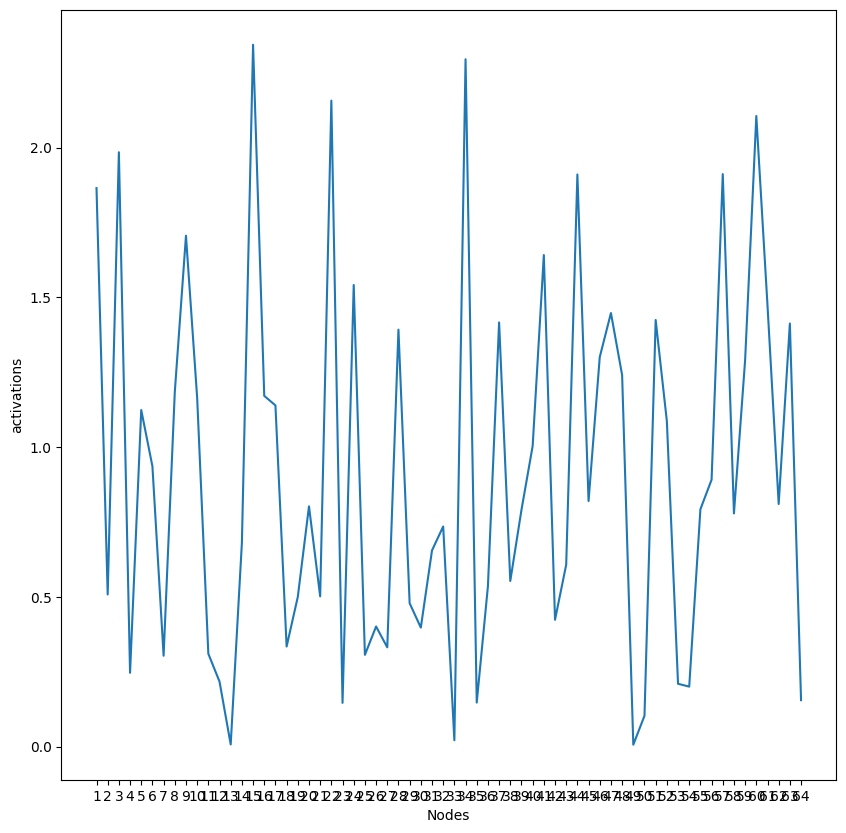

In [79]:
# get the average activation of the first layer for each node 
dense_activations_avg = np.mean(dense_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_activations_avg)
plt.xticks(range(64), range(1,65))
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()


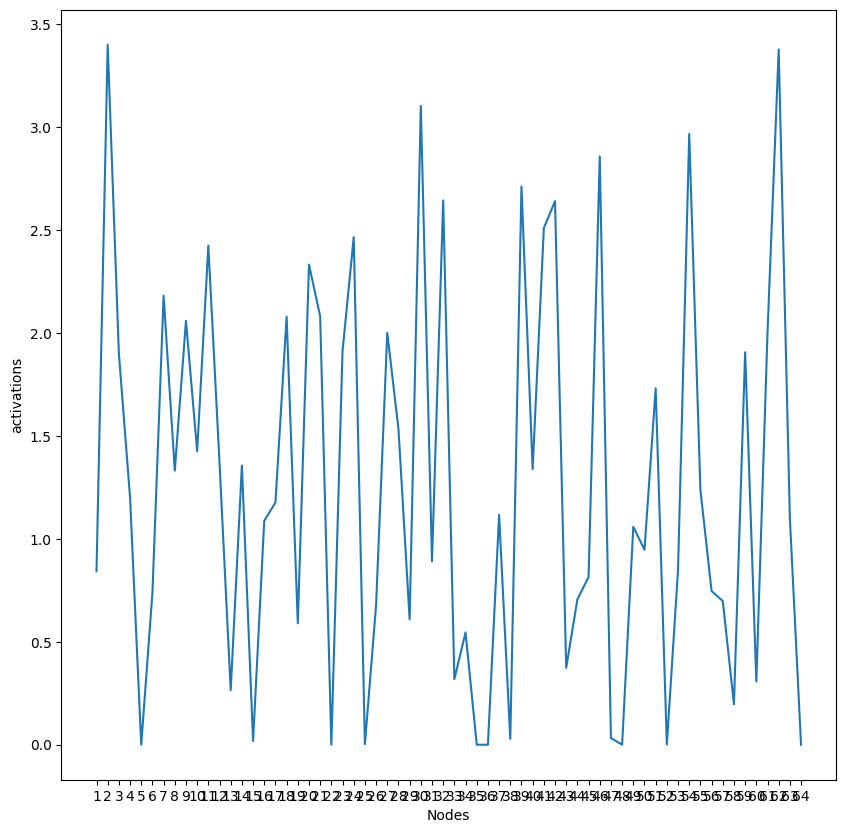

In [80]:
# now the next layer 
dense_1_activations_avg = np.mean(dense_1_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_1_activations_avg)
plt.xticks(range(64), range(1,65))
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()


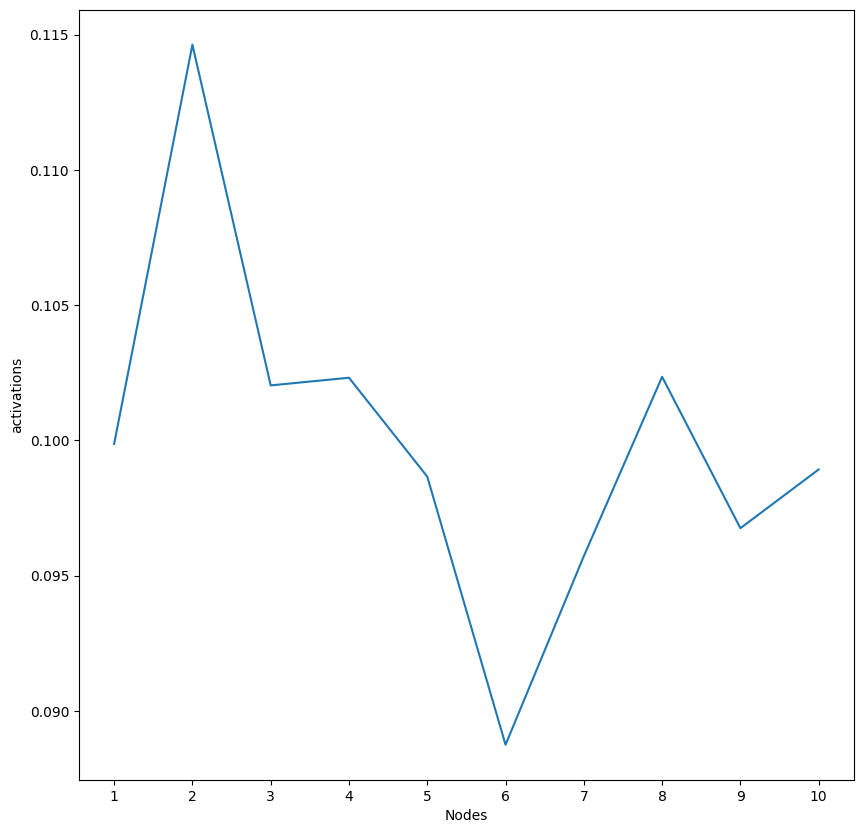

In [81]:
# now the next layer
dense_2_activations_avg = np.mean(dense_2_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_2_activations_avg)
plt.xticks(range(10), range(1,11))
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()

In [82]:
# make a mask of nodes with average activation greater than 0.1
dense_activation_mask = dense_activations_avg > 0.1
dense_1_activation_mask = dense_1_activations_avg > 0.5

print(dense_activation_mask.sum())
print(dense_1_activation_mask.sum())

61
48


In [83]:
# make a new model with the mask
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

first_iteration_model = Sequential()
first_iteration_model.add(Dense(dense_activations_avg.sum(), activation='relu', input_shape=(28*28,)))
first_iteration_model.add(Dense(dense_1_activation_mask.sum(), activation='relu'))
first_iteration_model.add(Dense(10, activation='softmax'))



In [84]:
# now recompile the model 
first_iteration_model.compile(optimizer=SGD(learning_rate=0.01),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [85]:
# evaluate the size of the model and memory usage
first_iteration_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 58)                45530     
                                                                 
 dense_10 (Dense)            (None, 48)                2832      
                                                                 
 dense_11 (Dense)            (None, 10)                490       
                                                                 
Total params: 48852 (190.83 KB)
Trainable params: 48852 (190.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
# train the model

history_first_iteration = first_iteration_model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)

# evaluate the model
test_loss, test_acc= first_iteration_model.evaluate(x_test, y_test)

Epoch 1/25
375/375 [==============================] - 4s 8ms/step - loss: 1.5941 - accuracy: 0.5443 - val_loss: 0.9065 - val_accuracy: 0.7687
Epoch 2/25
375/375 [==============================] - 2s 5ms/step - loss: 0.7109 - accuracy: 0.8061 - val_loss: 0.5333 - val_accuracy: 0.8591
Epoch 3/25
375/375 [==============================] - 2s 5ms/step - loss: 0.4990 - accuracy: 0.8640 - val_loss: 0.4176 - val_accuracy: 0.8867
Epoch 4/25
375/375 [==============================] - 2s 5ms/step - loss: 0.4169 - accuracy: 0.8856 - val_loss: 0.3645 - val_accuracy: 0.8980
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3747 - accuracy: 0.8964 - val_loss: 0.3365 - val_accuracy: 0.9052
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3481 - accuracy: 0.9021 - val_loss: 0.3170 - val_accuracy: 0.9102
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3287 - accuracy: 0.9067 - val_loss: 0.3009 - val_accuracy: 0.9153
Epoch 

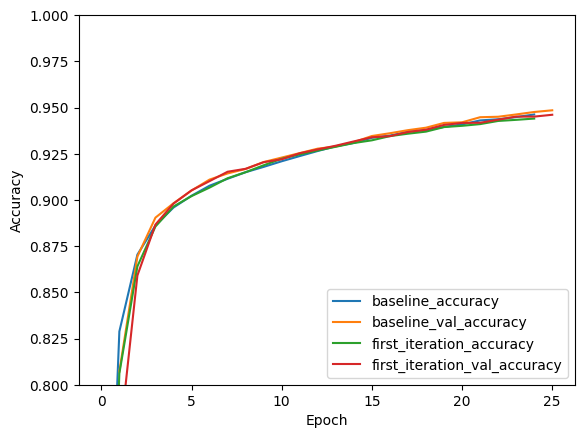

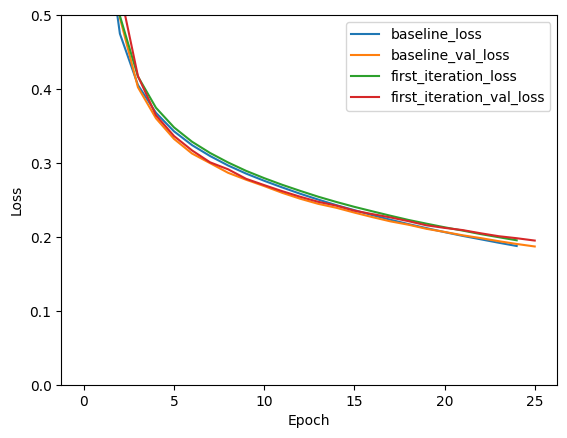

In [89]:
# now plot the loss and accuracy for the baseline and the first iteration with a legend 
plt.plot(range(len(history_baseline.history['accuracy'])), history_baseline.history['accuracy'], label='baseline_accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'])+1), history_baseline.history['val_accuracy'], label='baseline_val_accuracy')
plt.plot(range(len(history_first_iteration.history['accuracy'])), history_first_iteration.history['accuracy'], label='first_iteration_accuracy')
plt.plot(range(1,len(history_first_iteration.history['accuracy'])+1), history_first_iteration.history['val_accuracy'], label='first_iteration_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# plot the loss
plt.plot(range(len(history_baseline.history['loss'])), history_baseline.history['loss'], label='baseline_loss')
plt.plot(range(1,len(history_baseline.history['loss'])+1), history_baseline.history['val_loss'], label='baseline_val_loss')
plt.plot(range(len(history_first_iteration.history['loss'])), history_first_iteration.history['loss'], label='first_iteration_loss')
plt.plot(range(1,len(history_first_iteration.history['loss'])+1), history_first_iteration.history['val_loss'], label='first_iteration_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()

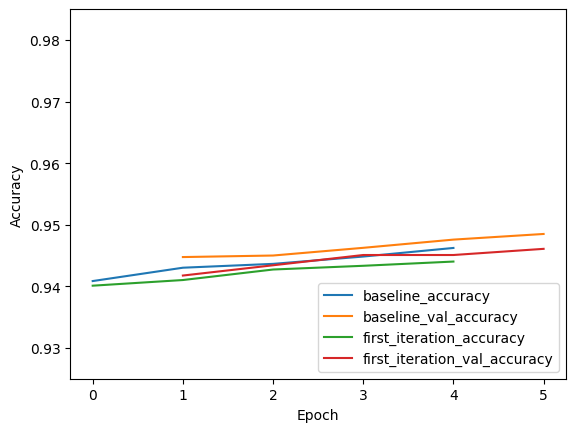

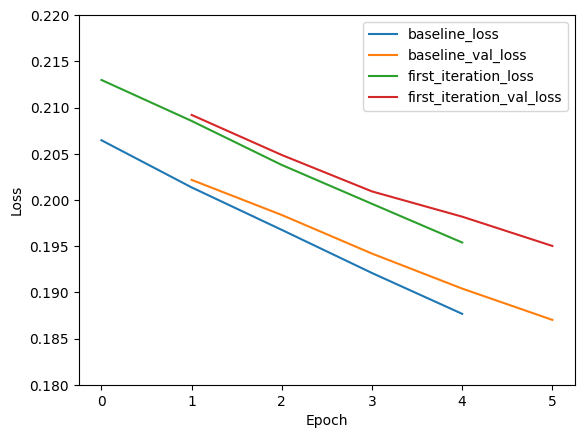

In [92]:
# now let's zoom in on the last five epochs 
plt.plot(range(len(history_baseline.history['accuracy'][-5:])), history_baseline.history['accuracy'][-5:], label='baseline_accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'][-5:])+1), history_baseline.history['val_accuracy'][-5:], label='baseline_val_accuracy')
plt.plot(range(len(history_first_iteration.history['accuracy'][-5:])), history_first_iteration.history['accuracy'][-5:], label='first_iteration_accuracy')
plt.plot(range(1,len(history_first_iteration.history['accuracy'][-5:])+1), history_first_iteration.history['val_accuracy'][-5:], label='first_iteration_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.925, 0.985])
plt.legend(loc='lower right')
plt.show()

# plot the loss
plt.plot(range(len(history_baseline.history['loss'][-5:])), history_baseline.history['loss'][-5:], label='baseline_loss')
plt.plot(range(1,len(history_baseline.history['loss'][-5:])+1), history_baseline.history['val_loss'][-5:], label='baseline_val_loss')
plt.plot(range(len(history_first_iteration.history['loss'][-5:])), history_first_iteration.history['loss'][-5:], label='first_iteration_loss')
plt.plot(range(1,len(history_first_iteration.history['loss'][-5:])+1), history_first_iteration.history['val_loss'][-5:], label='first_iteration_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.18, 0.22])
plt.legend(loc='upper right')
plt.show()

In [94]:
layer_outputs = [layer.output for layer in first_iteration_model.layers]
layer_names = [layer.name for layer in first_iteration_model.layers]
print(layer_outputs)
activation_model = Model(inputs=first_iteration_model.inputs, outputs=layer_outputs)
activation_model.summary()

[<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'dense_9')>, <KerasTensor: shape=(None, 48) dtype=float32 (created by layer 'dense_10')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_11')>]
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9_input (InputLayer)  [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 58)                45530     
                                                                 
 dense_10 (Dense)            (None, 48)                2832      
                                                                 
 dense_11 (Dense)            (None, 10)                490       
                                                                 
Total params: 48852 (190.83 KB)
Trainable params: 48852 (190.83 KB)
Non-trainable params: 0

In [95]:
(dense_activations, dense_1_activations, dense_2_activations) = activation_model(x_test)

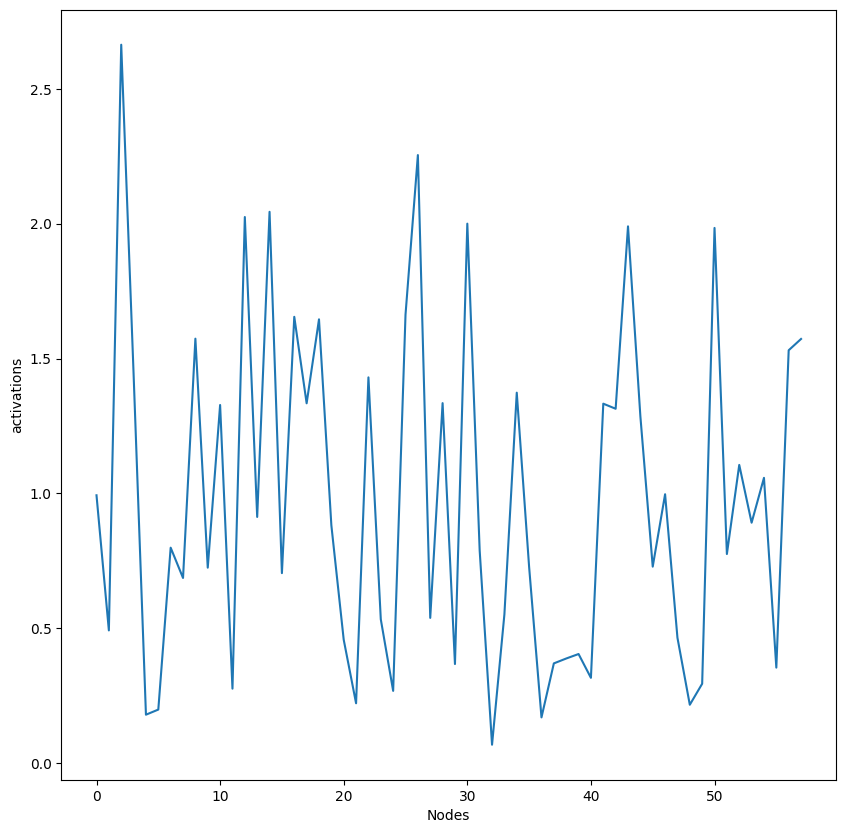

In [98]:
# get the average activation of the first layer for each node 
dense_activations_avg = np.mean(dense_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_activations_avg)
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()


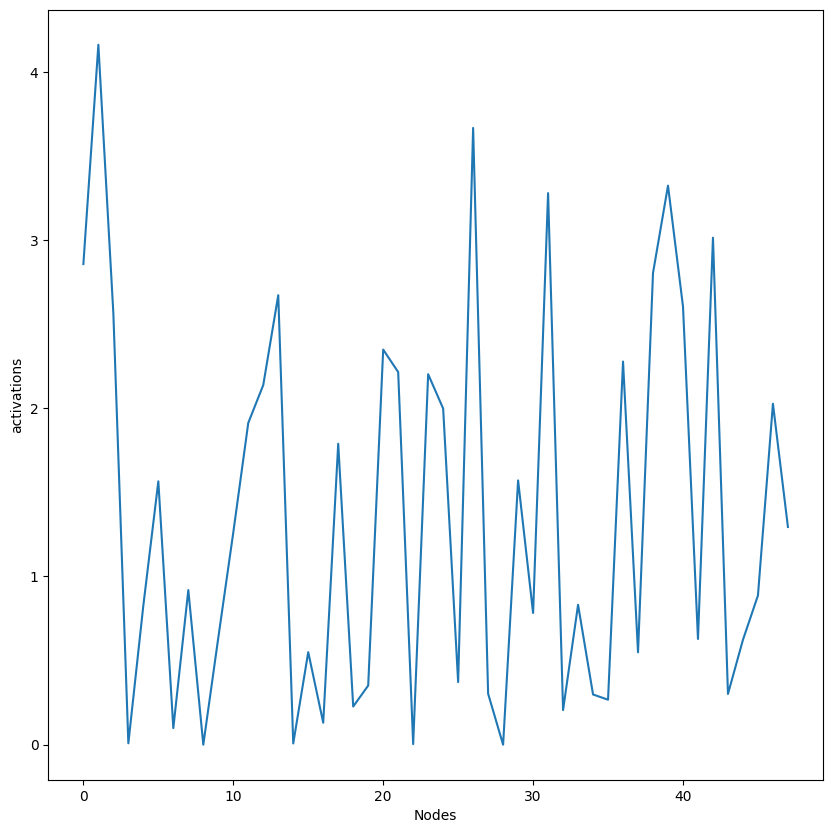

In [99]:
# now the next layer 
dense_1_activations_avg = np.mean(dense_1_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_1_activations_avg)
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()


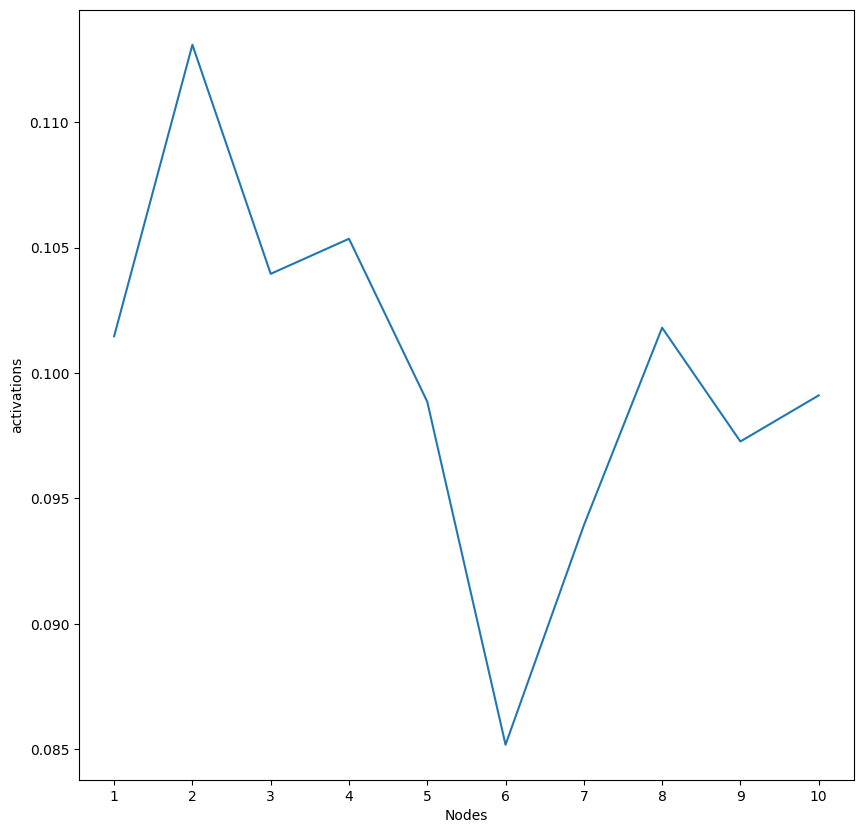

In [100]:
# now the next layer
dense_2_activations_avg = np.mean(dense_2_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_2_activations_avg)
plt.xticks(range(10), range(1,11))
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()

In [106]:
dense_activation_mask = dense_activations_avg > 0.5
dense_1_activation_mask = dense_1_activations_avg > 0.5

print(dense_activation_mask.sum())
print(dense_1_activation_mask.sum())

40
33


In [108]:
# make a new model with the mask


second_iteration_model = Sequential()
second_iteration_model.add(Dense(dense_activation_mask.sum(), activation='relu', input_shape=(28*28,)))
second_iteration_model.add(Dense(dense_1_activation_mask.sum(), activation='relu'))
second_iteration_model.add(Dense(10, activation='softmax'))



In [109]:
second_iteration_model.compile(optimizer=SGD(learning_rate=0.01),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [110]:
# evaluate the size of the model and memory usage
second_iteration_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 40)                31400     
                                                                 
 dense_19 (Dense)            (None, 33)                1353      
                                                                 
 dense_20 (Dense)            (None, 10)                340       
                                                                 
Total params: 33093 (129.27 KB)
Trainable params: 33093 (129.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# train the model

history_second_iteration = second_iteration_model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)

# evaluate the model
test_loss, test_acc= second_iteration_model.evaluate(x_test, y_test)

Epoch 1/25
375/375 [==============================] - 6s 13ms/step - loss: 1.5895 - accuracy: 0.5429 - val_loss: 0.8687 - val_accuracy: 0.8019
Epoch 2/25
375/375 [==============================] - 4s 9ms/step - loss: 0.6632 - accuracy: 0.8342 - val_loss: 0.4931 - val_accuracy: 0.8711
Epoch 3/25
375/375 [==============================] - 4s 10ms/step - loss: 0.4664 - accuracy: 0.8753 - val_loss: 0.3961 - val_accuracy: 0.8909
Epoch 4/25
375/375 [==============================] - 3s 9ms/step - loss: 0.3989 - accuracy: 0.8883 - val_loss: 0.3545 - val_accuracy: 0.9014
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3642 - accuracy: 0.8967 - val_loss: 0.3313 - val_accuracy: 0.9067
Epoch 6/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3421 - accuracy: 0.9025 - val_loss: 0.3142 - val_accuracy: 0.9113
Epoch 7/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3256 - accuracy: 0.9070 - val_loss: 0.3035 - val_accuracy: 0.9146
E

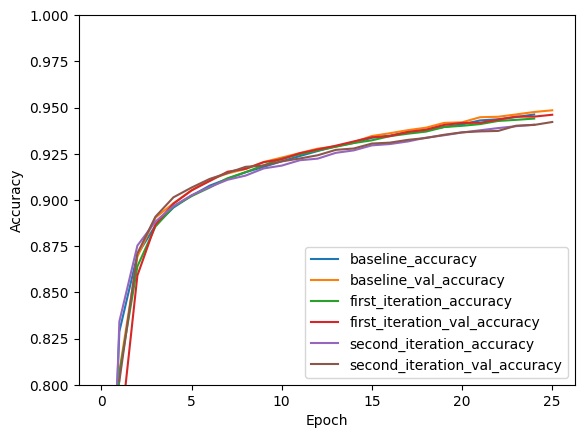

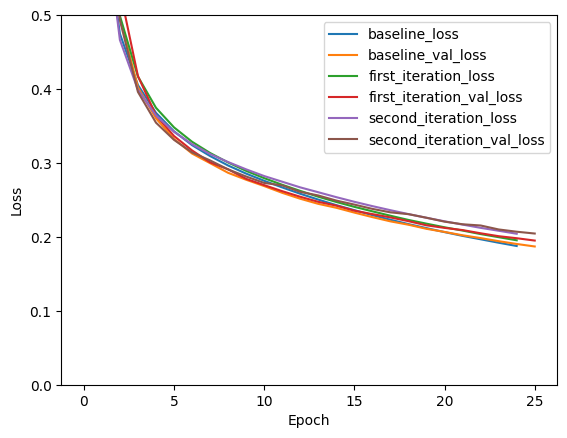

In [112]:
# now plot the loss and accuracy for the baseline and the first iteration and second iteration with a legend
plt.plot(range(len(history_baseline.history['accuracy'])), history_baseline.history['accuracy'], label='baseline_accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'])+1), history_baseline.history['val_accuracy'], label='baseline_val_accuracy')
plt.plot(range(len(history_first_iteration.history['accuracy'])), history_first_iteration.history['accuracy'], label='first_iteration_accuracy')
plt.plot(range(1,len(history_first_iteration.history['accuracy'])+1), history_first_iteration.history['val_accuracy'], label='first_iteration_val_accuracy')
plt.plot(range(len(history_second_iteration.history['accuracy'])), history_second_iteration.history['accuracy'], label='second_iteration_accuracy')
plt.plot(range(1,len(history_second_iteration.history['accuracy'])+1), history_second_iteration.history['val_accuracy'], label='second_iteration_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# plot the loss
plt.plot(range(len(history_baseline.history['loss'])), history_baseline.history['loss'], label='baseline_loss')
plt.plot(range(1,len(history_baseline.history['loss'])+1), history_baseline.history['val_loss'], label='baseline_val_loss')
plt.plot(range(len(history_first_iteration.history['loss'])), history_first_iteration.history['loss'], label='first_iteration_loss')
plt.plot(range(1,len(history_first_iteration.history['loss'])+1), history_first_iteration.history['val_loss'], label='first_iteration_val_loss')
plt.plot(range(len(history_second_iteration.history['loss'])), history_second_iteration.history['loss'], label='second_iteration_loss')
plt.plot(range(1,len(history_second_iteration.history['loss'])+1), history_second_iteration.history['val_loss'], label='second_iteration_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()


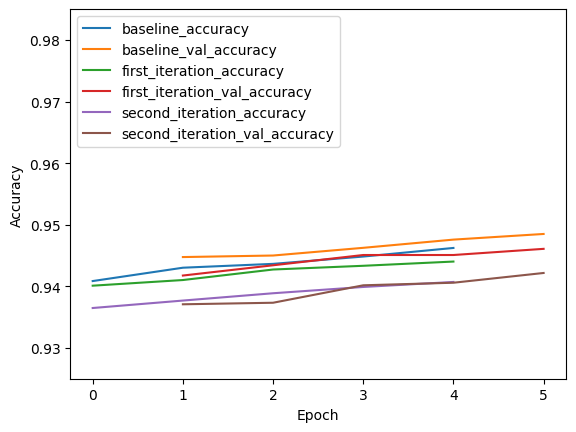

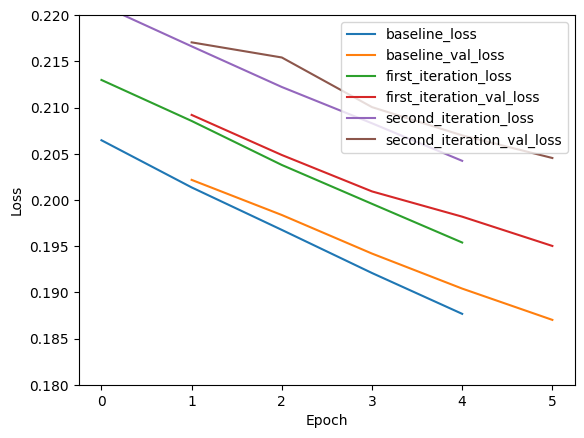

In [114]:
# now let's zoom in on the last five epochs
plt.plot(range(len(history_baseline.history['accuracy'][-5:])), history_baseline.history['accuracy'][-5:], label='baseline_accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'][-5:])+1), history_baseline.history['val_accuracy'][-5:], label='baseline_val_accuracy')
plt.plot(range(len(history_first_iteration.history['accuracy'][-5:])), history_first_iteration.history['accuracy'][-5:], label='first_iteration_accuracy')
plt.plot(range(1,len(history_first_iteration.history['accuracy'][-5:])+1), history_first_iteration.history['val_accuracy'][-5:], label='first_iteration_val_accuracy')
plt.plot(range(len(history_second_iteration.history['accuracy'][-5:])), history_second_iteration.history['accuracy'][-5:], label='second_iteration_accuracy')
plt.plot(range(1,len(history_second_iteration.history['accuracy'][-5:])+1), history_second_iteration.history['val_accuracy'][-5:], label='second_iteration_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.925, 0.985])
plt.legend(loc='upper left')
plt.show()

# plot the loss
plt.plot(range(len(history_baseline.history['loss'][-5:])), history_baseline.history['loss'][-5:], label='baseline_loss')
plt.plot(range(1,len(history_baseline.history['loss'][-5:])+1), history_baseline.history['val_loss'][-5:], label='baseline_val_loss')
plt.plot(range(len(history_first_iteration.history['loss'][-5:])), history_first_iteration.history['loss'][-5:], label='first_iteration_loss')
plt.plot(range(1,len(history_first_iteration.history['loss'][-5:])+1), history_first_iteration.history['val_loss'][-5:], label='first_iteration_val_loss')
plt.plot(range(len(history_second_iteration.history['loss'][-5:])), history_second_iteration.history['loss'][-5:], label='second_iteration_loss')
plt.plot(range(1,len(history_second_iteration.history['loss'][-5:])+1), history_second_iteration.history['val_loss'][-5:], label='second_iteration_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.18, 0.22])
plt.legend(loc='upper right')
plt.show()


In [115]:
layer_outputs = [layer.output for layer in second_iteration_model.layers]
layer_names = [layer.name for layer in second_iteration_model.layers]
print(layer_outputs)
activation_model = Model(inputs=second_iteration_model.inputs, outputs=layer_outputs)
activation_model.summary()

[<KerasTensor: shape=(None, 40) dtype=float32 (created by layer 'dense_18')>, <KerasTensor: shape=(None, 33) dtype=float32 (created by layer 'dense_19')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_20')>]
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18_input (InputLayer  [(None, 784)]             0         
 )                                                               
                                                                 
 dense_18 (Dense)            (None, 40)                31400     
                                                                 
 dense_19 (Dense)            (None, 33)                1353      
                                                                 
 dense_20 (Dense)            (None, 10)                340       
                                                                 
Total params: 33093 (129

In [116]:
(dense_activations, dense_1_activations, dense_2_activations) = activation_model(x_test)

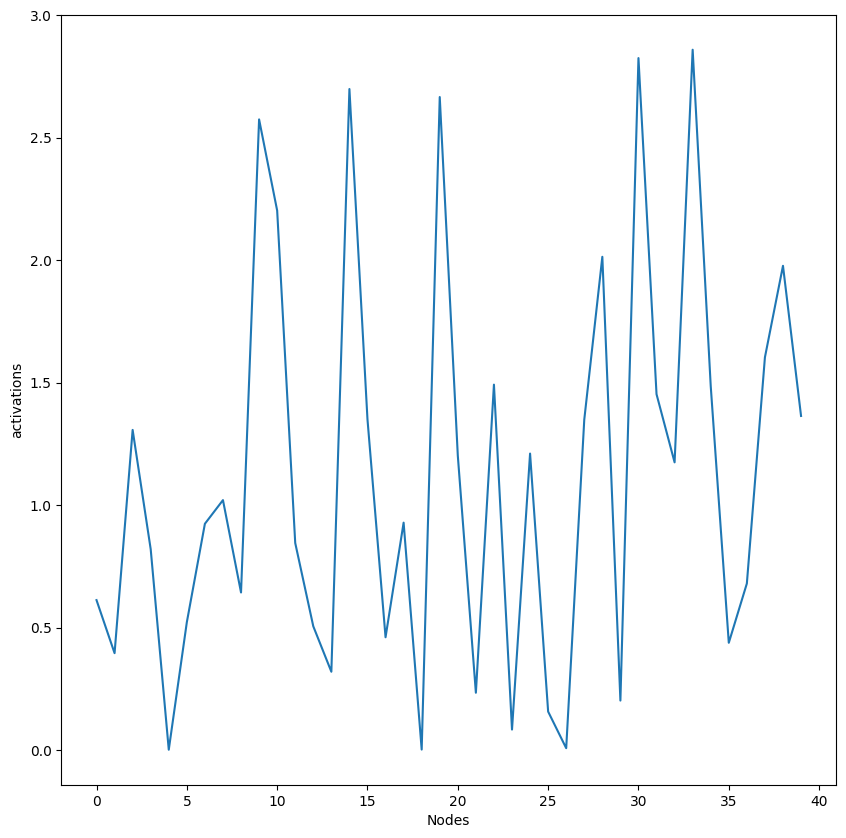

In [117]:
# get the average activation of the first layer for each node 
dense_activations_avg = np.mean(dense_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_activations_avg)
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()


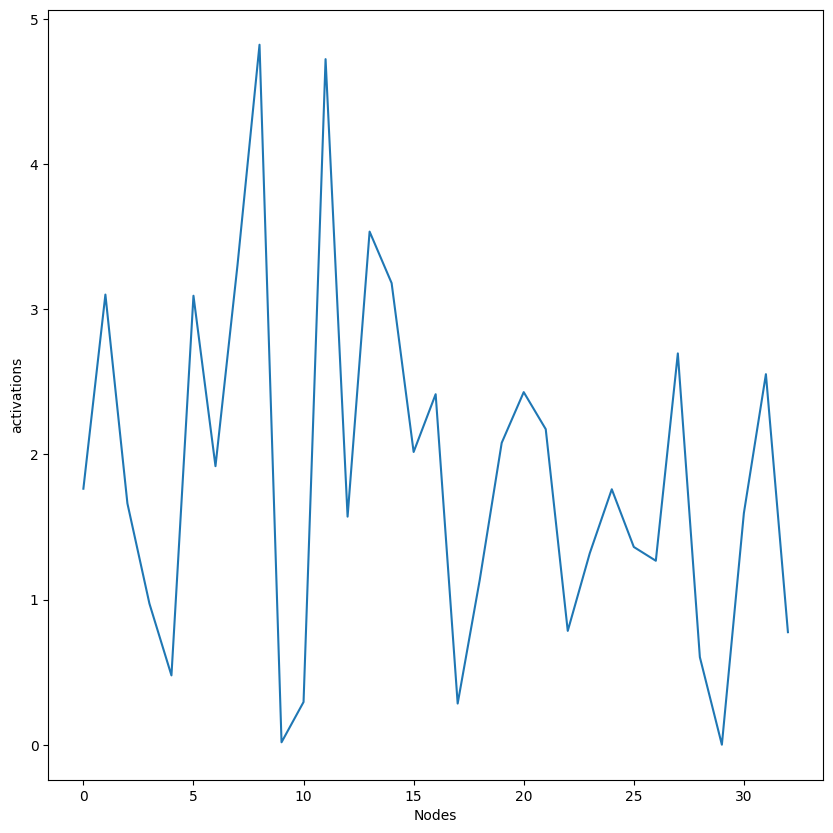

In [118]:
# now the next layer 
dense_1_activations_avg = np.mean(dense_1_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_1_activations_avg)
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()


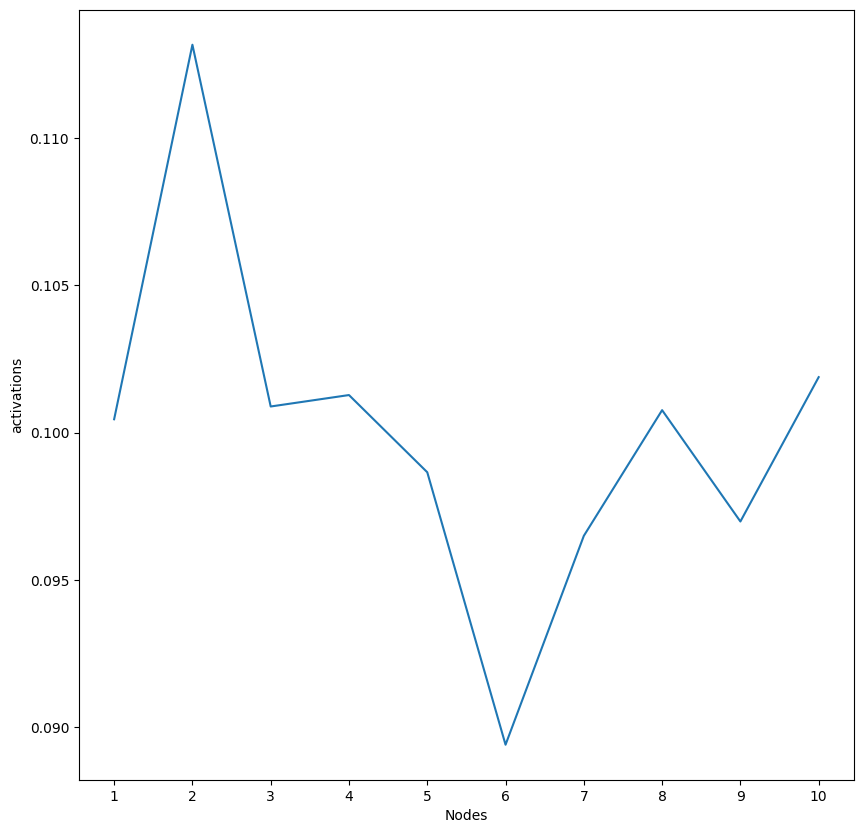

In [119]:
# now the next layer
dense_2_activations_avg = np.mean(dense_2_activations, axis=0)

# plot the average activation of the first layer for each node
plt.figure(figsize=(10,10))
plt.plot(dense_2_activations_avg)
plt.xticks(range(10), range(1,11))
plt.xlabel('Nodes')
plt.ylabel('activations')
plt.show()

In [120]:
dense_activation_mask = dense_activations_avg > 0.5
dense_1_activation_mask = dense_1_activations_avg > 0.5

print(dense_activation_mask.sum())
print(dense_1_activation_mask.sum())

29
28


In [121]:
# make a new model with the mask


third_iteration_model = Sequential()
third_iteration_model.add(Dense(dense_activation_mask.sum(), activation='relu', input_shape=(28*28,)))
third_iteration_model.add(Dense(dense_1_activation_mask.sum(), activation='relu'))
third_iteration_model.add(Dense(10, activation='softmax'))



In [122]:
third_iteration_model.compile(optimizer=SGD(learning_rate=0.01),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [123]:
# evaluate the size of the model and memory usage
third_iteration_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 29)                22765     
                                                                 
 dense_22 (Dense)            (None, 28)                840       
                                                                 
 dense_23 (Dense)            (None, 10)                290       
                                                                 
Total params: 23895 (93.34 KB)
Trainable params: 23895 (93.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
# train the model

history_third_iteration = third_iteration_model.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2)

# evaluate the model
test_loss, test_acc= third_iteration_model.evaluate(x_test, y_test)

Epoch 1/25
375/375 [==============================] - 8s 17ms/step - loss: 1.7397 - accuracy: 0.4847 - val_loss: 1.0937 - val_accuracy: 0.7483
Epoch 2/25
375/375 [==============================] - 5s 14ms/step - loss: 0.8196 - accuracy: 0.7829 - val_loss: 0.5939 - val_accuracy: 0.8405
Epoch 3/25
375/375 [==============================] - 5s 14ms/step - loss: 0.5421 - accuracy: 0.8540 - val_loss: 0.4471 - val_accuracy: 0.8813
Epoch 4/25
375/375 [==============================] - 5s 13ms/step - loss: 0.4389 - accuracy: 0.8806 - val_loss: 0.3841 - val_accuracy: 0.8965
Epoch 5/25
375/375 [==============================] - 5s 14ms/step - loss: 0.3892 - accuracy: 0.8929 - val_loss: 0.3517 - val_accuracy: 0.9037
Epoch 6/25
375/375 [==============================] - 3s 7ms/step - loss: 0.3597 - accuracy: 0.8996 - val_loss: 0.3297 - val_accuracy: 0.9085
Epoch 7/25
375/375 [==============================] - 3s 7ms/step - loss: 0.3394 - accuracy: 0.9040 - val_loss: 0.3140 - val_accuracy: 0.9139
E

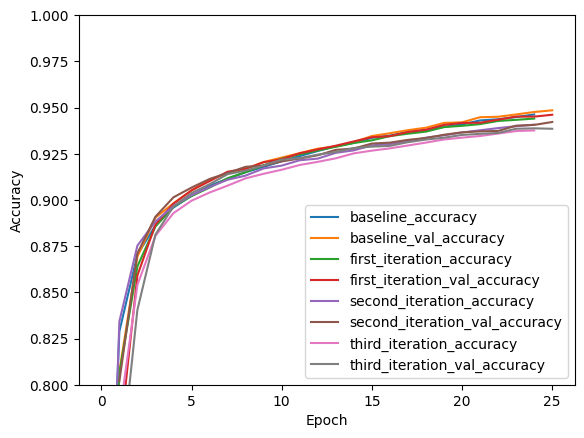

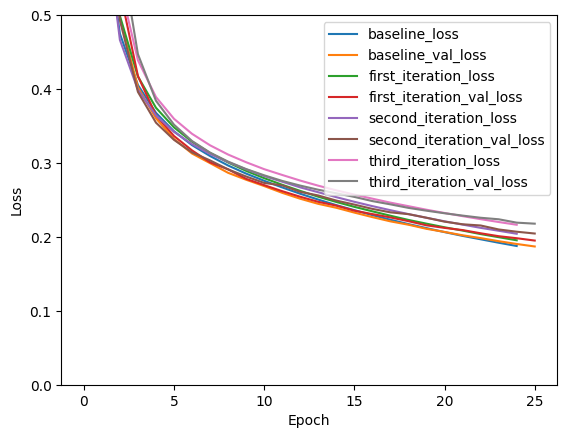

In [125]:
# now plot the loss and accuracy for the baseline and the first iteration and second iteration with a legend
plt.plot(range(len(history_baseline.history['accuracy'])), history_baseline.history['accuracy'], label='baseline_accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'])+1), history_baseline.history['val_accuracy'], label='baseline_val_accuracy')
plt.plot(range(len(history_first_iteration.history['accuracy'])), history_first_iteration.history['accuracy'], label='first_iteration_accuracy')
plt.plot(range(1,len(history_first_iteration.history['accuracy'])+1), history_first_iteration.history['val_accuracy'], label='first_iteration_val_accuracy')
plt.plot(range(len(history_second_iteration.history['accuracy'])), history_second_iteration.history['accuracy'], label='second_iteration_accuracy')
plt.plot(range(1,len(history_second_iteration.history['accuracy'])+1), history_second_iteration.history['val_accuracy'], label='second_iteration_val_accuracy')
plt.plot(range(len(history_third_iteration.history['accuracy'])), history_third_iteration.history['accuracy'], label='third_iteration_accuracy')
plt.plot(range(1,len(history_third_iteration.history['accuracy'])+1), history_third_iteration.history['val_accuracy'], label='third_iteration_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# plot the loss
plt.plot(range(len(history_baseline.history['loss'])), history_baseline.history['loss'], label='baseline_loss')
plt.plot(range(1,len(history_baseline.history['loss'])+1), history_baseline.history['val_loss'], label='baseline_val_loss')
plt.plot(range(len(history_first_iteration.history['loss'])), history_first_iteration.history['loss'], label='first_iteration_loss')
plt.plot(range(1,len(history_first_iteration.history['loss'])+1), history_first_iteration.history['val_loss'], label='first_iteration_val_loss')
plt.plot(range(len(history_second_iteration.history['loss'])), history_second_iteration.history['loss'], label='second_iteration_loss')
plt.plot(range(1,len(history_second_iteration.history['loss'])+1), history_second_iteration.history['val_loss'], label='second_iteration_val_loss')
plt.plot(range(len(history_third_iteration.history['loss'])), history_third_iteration.history['loss'], label='third_iteration_loss')
plt.plot(range(1,len(history_third_iteration.history['loss'])+1), history_third_iteration.history['val_loss'], label='third_iteration_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()


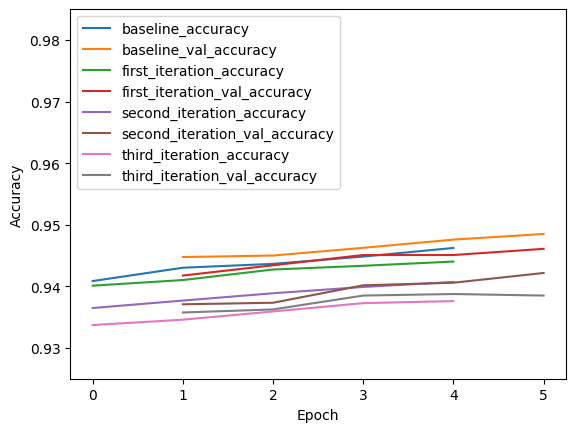

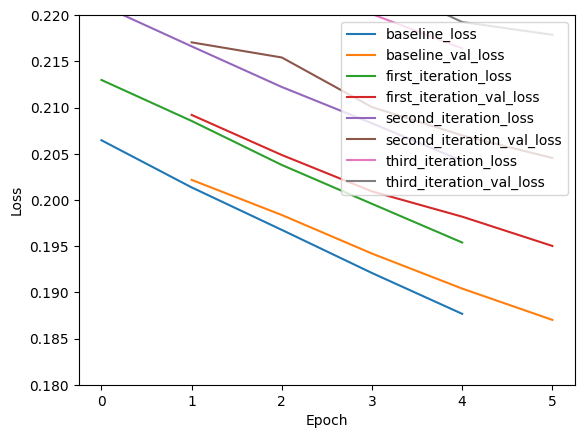

In [126]:
# now let's zoom in on the last five epochs
plt.plot(range(len(history_baseline.history['accuracy'][-5:])), history_baseline.history['accuracy'][-5:], label='baseline_accuracy')
plt.plot(range(1,len(history_baseline.history['accuracy'][-5:])+1), history_baseline.history['val_accuracy'][-5:], label='baseline_val_accuracy')
plt.plot(range(len(history_first_iteration.history['accuracy'][-5:])), history_first_iteration.history['accuracy'][-5:], label='first_iteration_accuracy')
plt.plot(range(1,len(history_first_iteration.history['accuracy'][-5:])+1), history_first_iteration.history['val_accuracy'][-5:], label='first_iteration_val_accuracy')
plt.plot(range(len(history_second_iteration.history['accuracy'][-5:])), history_second_iteration.history['accuracy'][-5:], label='second_iteration_accuracy')
plt.plot(range(1,len(history_second_iteration.history['accuracy'][-5:])+1), history_second_iteration.history['val_accuracy'][-5:], label='second_iteration_val_accuracy')
plt.plot(range(len(history_third_iteration.history['accuracy'][-5:])), history_third_iteration.history['accuracy'][-5:], label='third_iteration_accuracy')
plt.plot(range(1,len(history_third_iteration.history['accuracy'][-5:])+1), history_third_iteration.history['val_accuracy'][-5:], label='third_iteration_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.925, 0.985])
plt.legend(loc='upper left')
plt.show()

# plot the loss
plt.plot(range(len(history_baseline.history['loss'][-5:])), history_baseline.history['loss'][-5:], label='baseline_loss')
plt.plot(range(1,len(history_baseline.history['loss'][-5:])+1), history_baseline.history['val_loss'][-5:], label='baseline_val_loss')
plt.plot(range(len(history_first_iteration.history['loss'][-5:])), history_first_iteration.history['loss'][-5:], label='first_iteration_loss')
plt.plot(range(1,len(history_first_iteration.history['loss'][-5:])+1), history_first_iteration.history['val_loss'][-5:], label='first_iteration_val_loss')
plt.plot(range(len(history_second_iteration.history['loss'][-5:])), history_second_iteration.history['loss'][-5:], label='second_iteration_loss')
plt.plot(range(1,len(history_second_iteration.history['loss'][-5:])+1), history_second_iteration.history['val_loss'][-5:], label='second_iteration_val_loss')
plt.plot(range(len(history_third_iteration.history['loss'][-5:])), history_third_iteration.history['loss'][-5:], label='third_iteration_loss')
plt.plot(range(1,len(history_third_iteration.history['loss'][-5:])+1), history_third_iteration.history['val_loss'][-5:], label='third_iteration_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.18, 0.22])
plt.legend(loc='upper right')
plt.show()
